本记录是对使用的KNN方法的调参记录，主要内容是对K值的更换测试

由于本人能力有限，参与的项目相对较少，调出的结果想必不是最好的，还希望各位多加指教

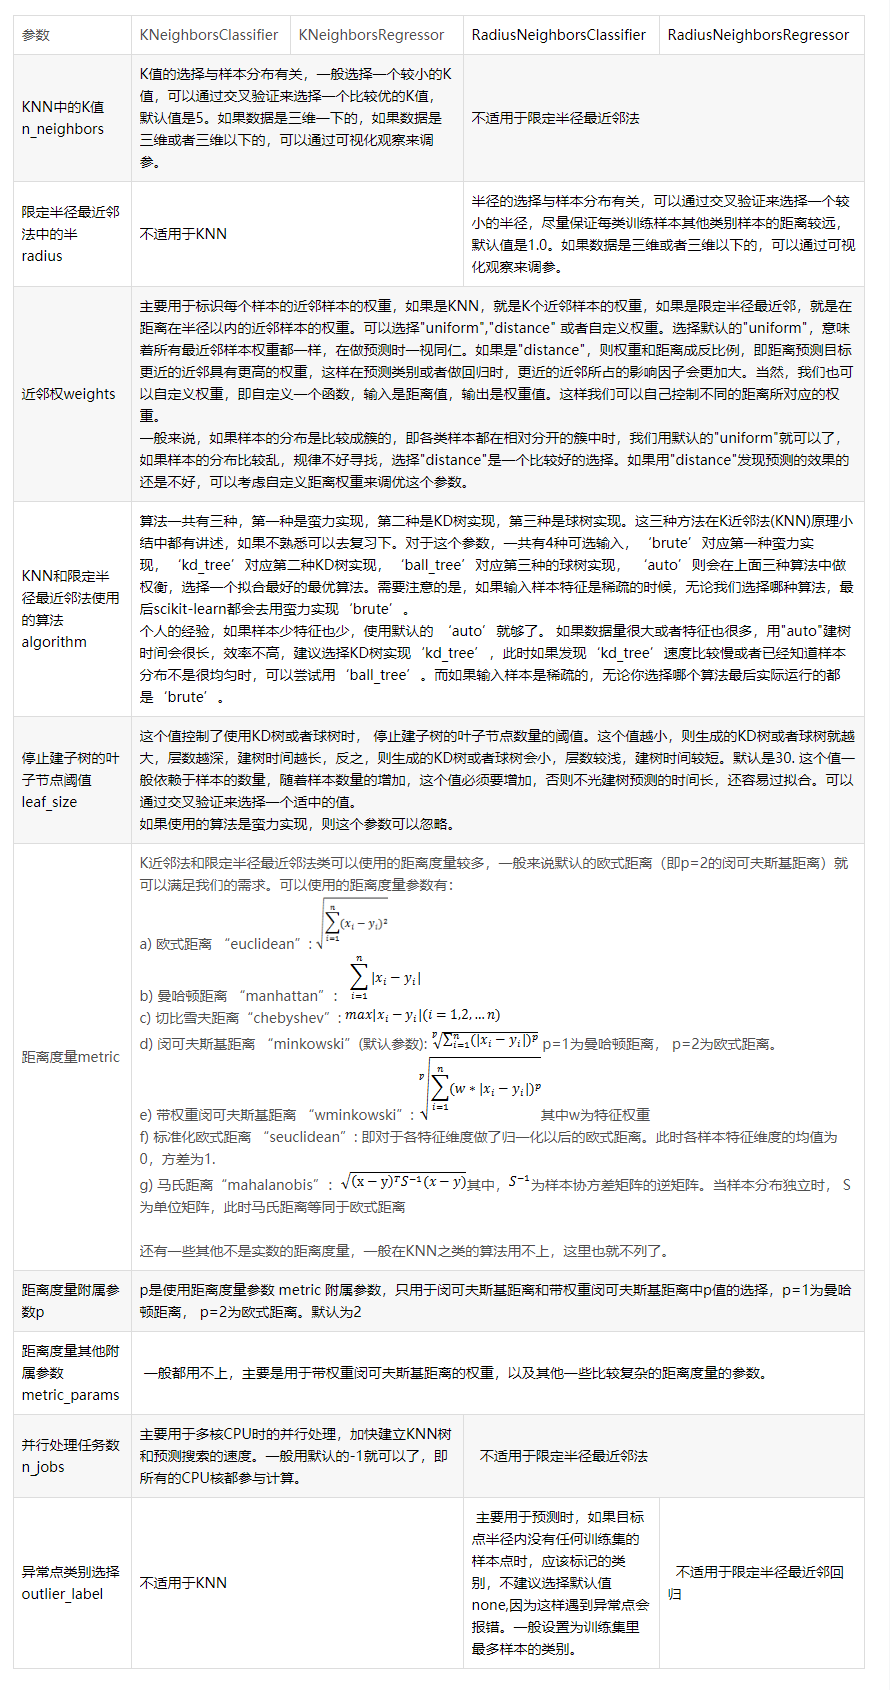

上述图片来源https://blog.csdn.net/weixin_42182448/article/details/88639391

结论就是KNN可调参数一般有

n_neighbors

weights

algorithm 
三个值

由于此处对特征值的向量空间没有清楚的认识，而且特征值过多，特征值对应的样本稀疏，因此采用欧氏距离，不加权重，brute算法实现

下方粗暴的遍历n_neighbors值，最终取23

造成KNN表现不好的原因主要包括两个，一个是样本的不平衡特点，一个是特征向量空间维度过高而又没有经过有效降维处理的原因

样本不平衡造成ham样本过多，spam过少，KNN在选取距离其最近的K个点时，偶然闯进的ham数量很可能相当大，以至于干扰分类器的判断

维度过高，而样本数又过少，不满足KNN“泛化错误概率不超过贝叶斯最优分类器错误率两倍”的前提条件，即“密采样”。由此导致的数据样本稀疏，距离计算困难问题是KNN表现不佳的主要原因。

In [1]:
# coding=utf-8
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz # doctest: +SKIP
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
import snowballstemmer
from nltk import SnowballStemmer

sms_data = pd.read_csv("E:/finalpaper/smm.csv",encoding = 'latin-1')

#设置字体并显示中文
plt.rcParams['font.family'] = 'SimHei'

sms_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms = sms_data.rename(columns = {'v1':'label','v2':'message'})

#去掉所有重复行
sms = sms.drop_duplicates()
sms.to_csv("E:/finalpaper/smm_drop.csv",encoding = 'latin-1',index = False)

#添加长度特征
sms['length'] = sms['message'].apply(len)
text_feat = sms['message'].copy()

def stemmer(text):
    text = text.split()
    words = ""
    for i in text:
        stemmer = SnowballStemmer("english")
        words += (stemmer.stem(i))+" "
    return words
text_feat = text_feat.apply(stemmer)

vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


KNN
0
KNN
1
KNN
2
KNN
3
KNN
4
KNN
5
KNN
6
KNN
7
KNN
8
KNN
9


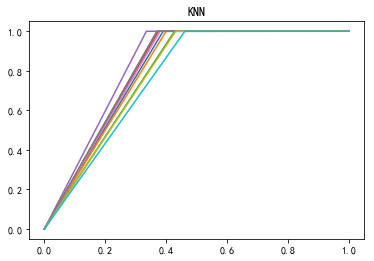

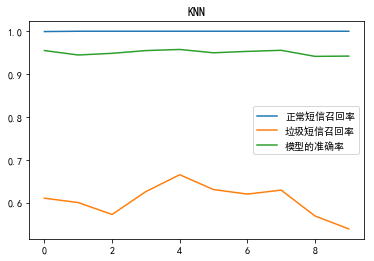

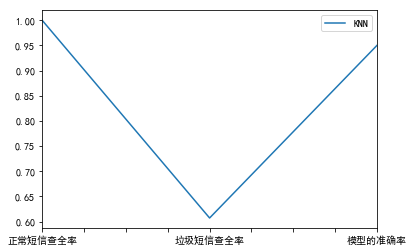

In [2]:
knc = KNeighborsClassifier(n_neighbors = 49)
clfs = {'KNN':knc}
a = []
figure_count = 0
key = 'KNN'
model = clfs[key]
score = []
hrecall = []
precall = []
b = []

plt.figure(figure_count)

for i in range(10):
    print(key)
    print(i)
    features_train,features_test,labels_train,labels_test = train_test_split(features,sms['label'],test_size = 0.3,random_state = 111 + i)
    model.fit(features_train,labels_train)
    score.append(sum(model.predict(features_test) == labels_test)*1.0/len(labels_test))
    cmat = confusion_matrix(model.predict(features_test),labels_test)
    fpr,tpr,thresholds = roc_curve(pd.DataFrame(labels_test).replace(('ham','spam'),(1,0)),pd.DataFrame(model.predict(features_test)).replace(('ham','spam'),(1,0)),pos_label = 1)
    hrecall.append(cmat[0,0]*1.0/(cmat[0,0] + cmat[1,0]))
    precall.append(cmat[1,1]*1.0/(cmat[0,1] + cmat[1,1]))
    recall = pd.DataFrame([hrecall,precall,score],index = [u'正常短信召回率',u'垃圾短信召回率',u'模型的准确率']).T

    plt.plot(fpr,tpr)

b.append(np.mean(recall.iloc[:,0]))
b.append((np.sum(recall.iloc[:,1]) - np.min(recall.iloc[:,1]) - np.max(recall.iloc[:,1]))/8)
b.append(np.mean(recall.iloc[:,2]))
a.append((key,b))

plt.title(key)
plt.show()
figure_count = figure_count + 1

plt.figure(figure_count)
plt.plot(recall.iloc[:,0])
plt.plot(recall.iloc[:,1])
plt.plot(recall.iloc[:,2])
plt.title(key)
plt.legend()
plt.show()

figure_count = figure_count + 1
    
data = pd.DataFrame(dict(a),index = [u'正常短信查全率',u'垃圾短信查全率',u'模型的准确率'])
data.plot()
plt.show()

In [8]:
for n_neighbors_count in range(60):
    n_neighbors_count = n_neighbors_count + 1
    knc = KNeighborsClassifier(n_neighbors = n_neighbors_count)
    clfs = {'KNN':knc}
    a = []
    key = 'KNN'
    model = clfs[key]
    score = []
    hrecall = []
    precall = []
    b = []
    
    for i in range(10):
        features_train,features_test,labels_train,labels_test = train_test_split(features,sms['label'],test_size = 0.3,random_state = 111 + i)
        model.fit(features_train,labels_train)
        score.append(sum(model.predict(features_test) == labels_test)*1.0/len(labels_test))
        cmat = confusion_matrix(model.predict(features_test),labels_test)
        fpr,tpr,thresholds = roc_curve(pd.DataFrame(labels_test).replace(('ham','spam'),(1,0)),pd.DataFrame(model.predict(features_test)).replace(('ham','spam'),(1,0)),pos_label = 1)
        hrecall.append(cmat[0,0]*1.0/(cmat[0,0] + cmat[1,0]))
        precall.append(cmat[1,1]*1.0/(cmat[0,1] + cmat[1,1]))
        recall = pd.DataFrame([hrecall,precall,score],index = [u'正常短信召回率',u'垃圾短信召回率',u'模型的准确率']).T

        plt.plot(fpr,tpr)
    print("垃圾短信查全率")
    print((np.sum(recall.iloc[:,1]) - np.min(recall.iloc[:,1]) - np.max(recall.iloc[:,1]))/8)
    print("n_neighbors_count：")
    print(n_neighbors_count)
    print('\n')

垃圾短信查全率
0.4860676987491751
n_neighbors_count：
1


垃圾短信查全率
0.3015458159372241
n_neighbors_count：
2


垃圾短信查全率
0.3064477767215379
n_neighbors_count：
3


垃圾短信查全率
0.217625676428766
n_neighbors_count：
4


垃圾短信查全率
0.3233871464706182
n_neighbors_count：
5


垃圾短信查全率
0.23029326254451432
n_neighbors_count：
6


垃圾短信查全率
0.5308829962467553
n_neighbors_count：
7


垃圾短信查全率
0.47847003736909455
n_neighbors_count：
8


垃圾短信查全率
0.6055691129166499
n_neighbors_count：
9


垃圾短信查全率
0.5547516036357808
n_neighbors_count：
10


垃圾短信查全率
0.6225960958015464
n_neighbors_count：
11


垃圾短信查全率
0.5918269472711898
n_neighbors_count：
12


垃圾短信查全率
0.6399657070776906
n_neighbors_count：
13


垃圾短信查全率
0.6096633292061486
n_neighbors_count：
14


垃圾短信查全率
0.6459697869108564
n_neighbors_count：
15


垃圾短信查全率
0.613305309095021
n_neighbors_count：
16


垃圾短信查全率
0.6430603434992113
n_neighbors_count：
17


垃圾短信查全率
0.6115890264033512
n_neighbors_count：
18


垃圾短信查全率
0.6454191054625587
n_neighbors_count：
19


垃圾短信查全率
0.6161886668683954
n_neighbors_c

In [5]:
print('\n')